In [3]:
#%pip install pandas


In [4]:
pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install --upgrade nbformat


Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install imbalanced-learn


Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install seaborn


Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install plotly.express

Note: you may need to restart the kernel to use updated packages.


In [11]:

import pandas as pd
import seaborn as sns
import pyforest


ModuleNotFoundError: No module named 'pyforest'

# DATA COLLECTION
- IMPORT THE DATA TO JUPYTER NB
- pandas for data manipulation




In [ ]:
df= pd.read_csv(r"C:\Users\EESHANI\Downloads\Copy of Sample_DATA.csv")


In [ ]:
df.head()

,Transaction_ID,Date,Time,Merchant_ID,Customer_ID,Device_ID,Transaction_Type,Payment_Gateway,Transaction_City,Transaction_State,IP_Address,Transaction_Status,Device_OS,Transaction_Frequency,Merchant_Category,Transaction_Channel,Transaction_Amount_Deviation,Days_Since_Last_Transaction,amount,fraud
0,T00022452,20/04/23,4:50:22 AM,f65a902b-2396-40cc-9593-97e103f1bc15,89aaeceb-21f5-46c8-9de3-89dde6a10a75,c1e0deb4-7c97-4178-a838-38f4a2f0b57c,Refund,SamplePay,Durgapur,Chhattisgarh,140.213.7.48,Completed,MacOS,1,Brand Vouchers and OTT,In-store,25.02,5,396.62,1
1,T00032233,08/08/23,8:09:21 AM,d4a5efcb-4eb6-4d3a-8132-07bb3e6e13a4,8a8962f9-e84a-4573-ab0b-187311978a21,62e14f64-b0ba-4284-889a-51ac05baf33e,Bank Transfer,SamplePay,Rajpur Sonarpur,Himachal Pradesh,184.108.177.45,Pending,Windows,30,Home delivery,Mobile,-36.64,20,121.94,1
2,T00037364,25/06/23,7:49:01 AM,759ad138-9473-4729-8699-3d72c7ffb983,c3f53ce6-e305-4460-a71d-93bde26043ab,4281c542-ac77-4269-b4bb-1de93ac12677,Bank Transfer,Other,New Delhi,Himachal Pradesh,16.106.248.163,Failed,Android,2,Utilities,Online,44.19,22,106.69,1
3,T00015924,28/01/24,5:44:12 AM,d8f561e4-bded-4ef0-bcd8-5494b2e31a94,9f0c5613-7d4c-4454-bee1-c47fbba406a1,058b6488-2469-42f2-bc7f-707921d35cad,Subscription,UPI Pay,Bharatpur,Chhattisgarh,65.245.160.212,Failed,Android,0,Purchases,Online,-54.34,28,3611.11,1
4,T00021805,21/06/23,9:40:59 AM,26fdd7a1-8537-4dfe-bcf7-f5a127b36682,bf9aa6d5-7d3d-43f9-8631-31336720a383,068ff12c-127a-4cfb-9899-ddde37060b28,Investment,Dummy Bank,Sagar,Mizoram,33.172.152.38,Completed,MacOS,1,Other,Online,12.38,25,374.89,1


In [ ]:
df.columns


Index(['Transaction_ID', 'Date', 'Time', 'Merchant_ID', 'Customer_ID',
       'Device_ID', 'Transaction_Type', 'Payment_Gateway', 'Transaction_City',
       'Transaction_State', 'IP_Address', 'Transaction_Status', 'Device_OS',
       'Transaction_Frequency', 'Merchant_Category', 'Transaction_Channel',
       'Transaction_Amount_Deviation', 'Days_Since_Last_Transaction', 'amount',
       'fraud'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 647 entries, 0 to 646
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Transaction_ID                647 non-null    object 
 1   Date                          647 non-null    object 
 2   Time                          647 non-null    object 
 3   Merchant_ID                   647 non-null    object 
 4   Customer_ID                   647 non-null    object 
 5   Device_ID                     647 non-null    object 
 6   Transaction_Type              647 non-null    object 
 7   Payment_Gateway               647 non-null    object 
 8   Transaction_City              647 non-null    object 
 9   Transaction_State             647 non-null    object 
 10  IP_Address                    647 non-null    object 
 11  Transaction_Status            647 non-null    object 
 12  Device_OS                     647 non-null    object 
 13  Trans

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Transaction_Frequency,647.0,3.564142,6.454543,0.00,1.000,2.00,3.00,50.00
Transaction_Amount_Deviation,647.0,5.014668,56.375914,-99.47,-42.355,8.38,52.29,99.45
Days_Since_Last_Transaction,647.0,15.717156,8.218122,1.00,8.500,16.00,23.00,29.00
amount,647.0,128.839753,364.995747,0.12,17.155,35.00,74.77,4883.62
fraud,647.0,0.239567,0.427150,0.00,0.000,0.00,0.00,1.00


In [ ]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
642    False
643    False
644    False
645    False
646    False
Length: 647, dtype: bool

In [ ]:
df.duplicated().sum()

np.int64(0)

# MISSING VALUES


In [ ]:
df.isnull().sum()

Transaction_ID                  0
Date                            0
Time                            0
Merchant_ID                     0
Customer_ID                     0
Device_ID                       0
Transaction_Type                0
Payment_Gateway                 0
Transaction_City                0
Transaction_State               0
IP_Address                      0
Transaction_Status              0
Device_OS                       0
Transaction_Frequency           0
Merchant_Category               0
Transaction_Channel             0
Transaction_Amount_Deviation    0
Days_Since_Last_Transaction     0
amount                          0
fraud                           0
dtype: int64

## SHAPE

In [ ]:
df.shape

(647, 20)

In [ ]:
df.nunique()

Transaction_ID                  647
Date                            302
Time                            641
Merchant_ID                     647
Customer_ID                     647
Device_ID                       647
Transaction_Type                  7
Payment_Gateway                   9
Transaction_City                281
Transaction_State                28
IP_Address                      647
Transaction_Status                3
Device_OS                         4
Transaction_Frequency            14
Merchant_Category                10
Transaction_Channel               3
Transaction_Amount_Deviation    635
Days_Since_Last_Transaction      29
amount                          633
fraud                             2
dtype: int64

In [ ]:
df = df.drop(['Transaction_ID'],axis = 1)

In [ ]:
df.head()

,Date,Time,Merchant_ID,Customer_ID,Device_ID,Transaction_Type,Payment_Gateway,Transaction_City,Transaction_State,IP_Address,Transaction_Status,Device_OS,Transaction_Frequency,Merchant_Category,Transaction_Channel,Transaction_Amount_Deviation,Days_Since_Last_Transaction,amount,fraud
0,20/04/23,4:50:22 AM,f65a902b-2396-40cc-9593-97e103f1bc15,89aaeceb-21f5-46c8-9de3-89dde6a10a75,c1e0deb4-7c97-4178-a838-38f4a2f0b57c,Refund,SamplePay,Durgapur,Chhattisgarh,140.213.7.48,Completed,MacOS,1,Brand Vouchers and OTT,In-store,25.02,5,396.62,1
1,08/08/23,8:09:21 AM,d4a5efcb-4eb6-4d3a-8132-07bb3e6e13a4,8a8962f9-e84a-4573-ab0b-187311978a21,62e14f64-b0ba-4284-889a-51ac05baf33e,Bank Transfer,SamplePay,Rajpur Sonarpur,Himachal Pradesh,184.108.177.45,Pending,Windows,30,Home delivery,Mobile,-36.64,20,121.94,1
2,25/06/23,7:49:01 AM,759ad138-9473-4729-8699-3d72c7ffb983,c3f53ce6-e305-4460-a71d-93bde26043ab,4281c542-ac77-4269-b4bb-1de93ac12677,Bank Transfer,Other,New Delhi,Himachal Pradesh,16.106.248.163,Failed,Android,2,Utilities,Online,44.19,22,106.69,1
3,28/01/24,5:44:12 AM,d8f561e4-bded-4ef0-bcd8-5494b2e31a94,9f0c5613-7d4c-4454-bee1-c47fbba406a1,058b6488-2469-42f2-bc7f-707921d35cad,Subscription,UPI Pay,Bharatpur,Chhattisgarh,65.245.160.212,Failed,Android,0,Purchases,Online,-54.34,28,3611.11,1
4,21/06/23,9:40:59 AM,26fdd7a1-8537-4dfe-bcf7-f5a127b36682,bf9aa6d5-7d3d-43f9-8631-31336720a383,068ff12c-127a-4cfb-9899-ddde37060b28,Investment,Dummy Bank,Sagar,Mizoram,33.172.152.38,Completed,MacOS,1,Other,Online,12.38,25,374.89,1


In [ ]:
df.drop(['Merchant_ID','Customer_ID','Device_ID','IP_Address'],axis = 1,inplace = True)

In [ ]:
df.head(2)

,Date,Time,Transaction_Type,Payment_Gateway,Transaction_City,Transaction_State,Transaction_Status,Device_OS,Transaction_Frequency,Merchant_Category,Transaction_Channel,Transaction_Amount_Deviation,Days_Since_Last_Transaction,amount,fraud
0,20/04/23,4:50:22 AM,Refund,SamplePay,Durgapur,Chhattisgarh,Completed,MacOS,1,Brand Vouchers and OTT,In-store,25.02,5,396.62,1
1,08/08/23,8:09:21 AM,Bank Transfer,SamplePay,Rajpur Sonarpur,Himachal Pradesh,Pending,Windows,30,Home delivery,Mobile,-36.64,20,121.94,1


In [ ]:
# DATA CLEARING AND  FEATURE ENGINEERING

In [ ]:
df['Date']

0      20/04/23
1      08/08/23
2      25/06/23
3      28/01/24
4      21/06/23
         ...   
642    24/07/23
643    05/07/23
644    16/04/23
645    28/10/23
646    11/04/24
Name: Date, Length: 647, dtype: object

In [ ]:
df[['Date','amount']]

,Date,amount
0,20/04/23,396.62
1,08/08/23,121.94
2,25/06/23,106.69
3,28/01/24,3611.11
4,21/06/23,374.89
...,...,...
642,24/07/23,28.27
643,05/07/23,26.26
644,16/04/23,6.02
645,28/10/23,17.12


In [ ]:
import datetime as dt

In [ ]:
df['Date'] =pd.to_datetime(df['Date'],format = '%d/%m/%y')

In [ ]:
df['Year'] = df['Date'].dt.year

In [ ]:
df.head()

,Date,Time,Transaction_Type,Payment_Gateway,Transaction_City,Transaction_State,Transaction_Status,Device_OS,Transaction_Frequency,Merchant_Category,Transaction_Channel,Transaction_Amount_Deviation,Days_Since_Last_Transaction,amount,fraud,Year
0,2023-04-20,4:50:22 AM,Refund,SamplePay,Durgapur,Chhattisgarh,Completed,MacOS,1,Brand Vouchers and OTT,In-store,25.02,5,396.62,1,2023
1,2023-08-08,8:09:21 AM,Bank Transfer,SamplePay,Rajpur Sonarpur,Himachal Pradesh,Pending,Windows,30,Home delivery,Mobile,-36.64,20,121.94,1,2023
2,2023-06-25,7:49:01 AM,Bank Transfer,Other,New Delhi,Himachal Pradesh,Failed,Android,2,Utilities,Online,44.19,22,106.69,1,2023
3,2024-01-28,5:44:12 AM,Subscription,UPI Pay,Bharatpur,Chhattisgarh,Failed,Android,0,Purchases,Online,-54.34,28,3611.11,1,2024
4,2023-06-21,9:40:59 AM,Investment,Dummy Bank,Sagar,Mizoram,Completed,MacOS,1,Other,Online,12.38,25,374.89,1,2023


In [ ]:
df['Month'] = df['Date'].dt.month

In [ ]:
df.head()

,Date,Time,Transaction_Type,Payment_Gateway,Transaction_City,Transaction_State,Transaction_Status,Device_OS,Transaction_Frequency,Merchant_Category,Transaction_Channel,Transaction_Amount_Deviation,Days_Since_Last_Transaction,amount,fraud,Year,Month
0,2023-04-20,4:50:22 AM,Refund,SamplePay,Durgapur,Chhattisgarh,Completed,MacOS,1,Brand Vouchers and OTT,In-store,25.02,5,396.62,1,2023,4
1,2023-08-08,8:09:21 AM,Bank Transfer,SamplePay,Rajpur Sonarpur,Himachal Pradesh,Pending,Windows,30,Home delivery,Mobile,-36.64,20,121.94,1,2023,8
2,2023-06-25,7:49:01 AM,Bank Transfer,Other,New Delhi,Himachal Pradesh,Failed,Android,2,Utilities,Online,44.19,22,106.69,1,2023,6
3,2024-01-28,5:44:12 AM,Subscription,UPI Pay,Bharatpur,Chhattisgarh,Failed,Android,0,Purchases,Online,-54.34,28,3611.11,1,2024,1
4,2023-06-21,9:40:59 AM,Investment,Dummy Bank,Sagar,Mizoram,Completed,MacOS,1,Other,Online,12.38,25,374.89,1,2023,6


In [ ]:
df['Month']

0       4
1       8
2       6
3       1
4       6
       ..
642     7
643     7
644     4
645    10
646     4
Name: Month, Length: 647, dtype: int32

In [ ]:
df['Month'].sort_values(ascending = True)

636     1
631     1
627     1
3       1
36      1
       ..
89     12
98     12
48     12
60     12
43     12
Name: Month, Length: 647, dtype: int32

In [ ]:
months = {1:'Jan',
          2:'Feb',
            3:'Mar',
              4:'Apr',
  5:'May',
  6:'Jun',
  7:'July',
  8:'Aug',
  9:'Sept',
  10:'Oct',
  11:'Nov',
  12:'Dec',

}

In [ ]:
df['Month'] = df['Month'].map(months)

In [ ]:
df.head()

,Date,Time,Transaction_Type,Payment_Gateway,Transaction_City,Transaction_State,Transaction_Status,Device_OS,Transaction_Frequency,Merchant_Category,Transaction_Channel,Transaction_Amount_Deviation,Days_Since_Last_Transaction,amount,fraud,Year,Month
0,2023-04-20,4:50:22 AM,Refund,SamplePay,Durgapur,Chhattisgarh,Completed,MacOS,1,Brand Vouchers and OTT,In-store,25.02,5,396.62,1,2023,Apr
1,2023-08-08,8:09:21 AM,Bank Transfer,SamplePay,Rajpur Sonarpur,Himachal Pradesh,Pending,Windows,30,Home delivery,Mobile,-36.64,20,121.94,1,2023,Aug
2,2023-06-25,7:49:01 AM,Bank Transfer,Other,New Delhi,Himachal Pradesh,Failed,Android,2,Utilities,Online,44.19,22,106.69,1,2023,Jun
3,2024-01-28,5:44:12 AM,Subscription,UPI Pay,Bharatpur,Chhattisgarh,Failed,Android,0,Purchases,Online,-54.34,28,3611.11,1,2024,Jan
4,2023-06-21,9:40:59 AM,Investment,Dummy Bank,Sagar,Mizoram,Completed,MacOS,1,Other,Online,12.38,25,374.89,1,2023,Jun


In [ ]:
df.columns

Index(['Date', 'Time', 'Transaction_Type', 'Payment_Gateway',
       'Transaction_City', 'Transaction_State', 'Transaction_Status',
       'Device_OS', 'Transaction_Frequency', 'Merchant_Category',
       'Transaction_Channel', 'Transaction_Amount_Deviation',
       'Days_Since_Last_Transaction', 'amount', 'fraud', 'Year', 'Month'],
      dtype='object')

In [ ]:
df.drop(['Date'],axis = 1,inplace = True)

In [ ]:
df.columns

Index(['Time', 'Transaction_Type', 'Payment_Gateway', 'Transaction_City',
       'Transaction_State', 'Transaction_Status', 'Device_OS',
       'Transaction_Frequency', 'Merchant_Category', 'Transaction_Channel',
       'Transaction_Amount_Deviation', 'Days_Since_Last_Transaction', 'amount',
       'fraud', 'Year', 'Month'],
      dtype='object')

In [ ]:
df.drop(['Time'],axis = 1,inplace = True)

In [ ]:
df['fraud'].value_counts(normalize = True)*100

fraud
0    76.043277
1    23.956723
Name: proportion, dtype: float64

<Axes: xlabel='fraud', ylabel='count'>

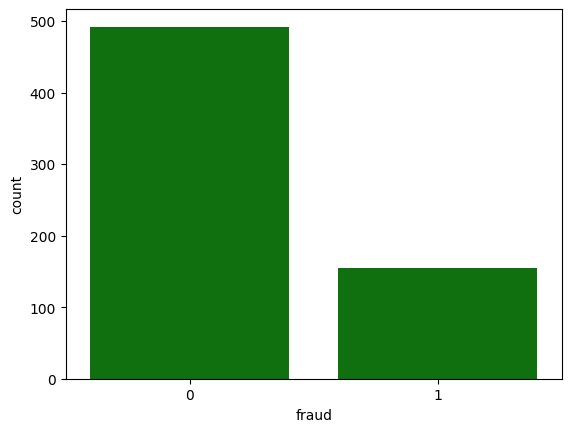

In [ ]:
sns.countplot(data=df,x = 'fraud',color ='GREEN')

# CREATE SEPARATE DATA SETS FOR NORMAL AND FRAUD TRANSACTIONS

In [ ]:
df.columns

Index(['Transaction_Type', 'Payment_Gateway', 'Transaction_City',
       'Transaction_State', 'Transaction_Status', 'Device_OS',
       'Transaction_Frequency', 'Merchant_Category', 'Transaction_Channel',
       'Transaction_Amount_Deviation', 'Days_Since_Last_Transaction', 'amount',
       'fraud', 'Year', 'Month'],
      dtype='object')

In [ ]:
fraud = df[df['fraud'] ==1]

In [ ]:
fraud.head()

,Transaction_Type,Payment_Gateway,Transaction_City,Transaction_State,Transaction_Status,Device_OS,Transaction_Frequency,Merchant_Category,Transaction_Channel,Transaction_Amount_Deviation,Days_Since_Last_Transaction,amount,fraud,Year,Month
0,Refund,SamplePay,Durgapur,Chhattisgarh,Completed,MacOS,1,Brand Vouchers and OTT,In-store,25.02,5,396.62,1,2023,Apr
1,Bank Transfer,SamplePay,Rajpur Sonarpur,Himachal Pradesh,Pending,Windows,30,Home delivery,Mobile,-36.64,20,121.94,1,2023,Aug
2,Bank Transfer,Other,New Delhi,Himachal Pradesh,Failed,Android,2,Utilities,Online,44.19,22,106.69,1,2023,Jun
3,Subscription,UPI Pay,Bharatpur,Chhattisgarh,Failed,Android,0,Purchases,Online,-54.34,28,3611.11,1,2024,Jan
4,Investment,Dummy Bank,Sagar,Mizoram,Completed,MacOS,1,Other,Online,12.38,25,374.89,1,2023,Jun


In [ ]:
fraud.shape

(155, 15)

In [ ]:
df.shape

(647, 15)

In [ ]:
df.fraud.value_counts()

fraud
0    492
1    155
Name: count, dtype: int64

In [ ]:
normal = df[df['fraud'] ==0]

In [ ]:
normal.shape

(492, 15)

In [ ]:
fraud.head()

,Transaction_Type,Payment_Gateway,Transaction_City,Transaction_State,Transaction_Status,Device_OS,Transaction_Frequency,Merchant_Category,Transaction_Channel,Transaction_Amount_Deviation,Days_Since_Last_Transaction,amount,fraud,Year,Month
0,Refund,SamplePay,Durgapur,Chhattisgarh,Completed,MacOS,1,Brand Vouchers and OTT,In-store,25.02,5,396.62,1,2023,Apr
1,Bank Transfer,SamplePay,Rajpur Sonarpur,Himachal Pradesh,Pending,Windows,30,Home delivery,Mobile,-36.64,20,121.94,1,2023,Aug
2,Bank Transfer,Other,New Delhi,Himachal Pradesh,Failed,Android,2,Utilities,Online,44.19,22,106.69,1,2023,Jun
3,Subscription,UPI Pay,Bharatpur,Chhattisgarh,Failed,Android,0,Purchases,Online,-54.34,28,3611.11,1,2024,Jan
4,Investment,Dummy Bank,Sagar,Mizoram,Completed,MacOS,1,Other,Online,12.38,25,374.89,1,2023,Jun


In [ ]:
fraud.dtypes

Transaction_Type                 object
Payment_Gateway                  object
Transaction_City                 object
Transaction_State                object
Transaction_Status               object
Device_OS                        object
Transaction_Frequency             int64
Merchant_Category                object
Transaction_Channel              object
Transaction_Amount_Deviation    float64
Days_Since_Last_Transaction       int64
amount                          float64
fraud                             int64
Year                              int32
Month                            object
dtype: object

In [ ]:
numeric_columns = fraud.select_dtypes(include=['int64','int32','float'])

In [ ]:
cat_columns = fraud.select_dtypes(include= object)

In [ ]:
numeric_columns.corr()

,Transaction_Frequency,Transaction_Amount_Deviation,Days_Since_Last_Transaction,amount,fraud,Year
Transaction_Frequency,1.000000,0.112079,0.048399,-0.047628,NaN,-0.068477
Transaction_Amount_Deviation,0.112079,1.000000,-0.057579,-0.034097,NaN,-0.005956
Days_Since_Last_Transaction,0.048399,-0.057579,1.000000,0.078918,NaN,-0.003681
amount,-0.047628,-0.034097,0.078918,1.000000,NaN,0.022114
fraud,NaN,NaN,NaN,NaN,NaN,NaN
Year,-0.068477,-0.005956,-0.003681,0.022114,NaN,1.000000


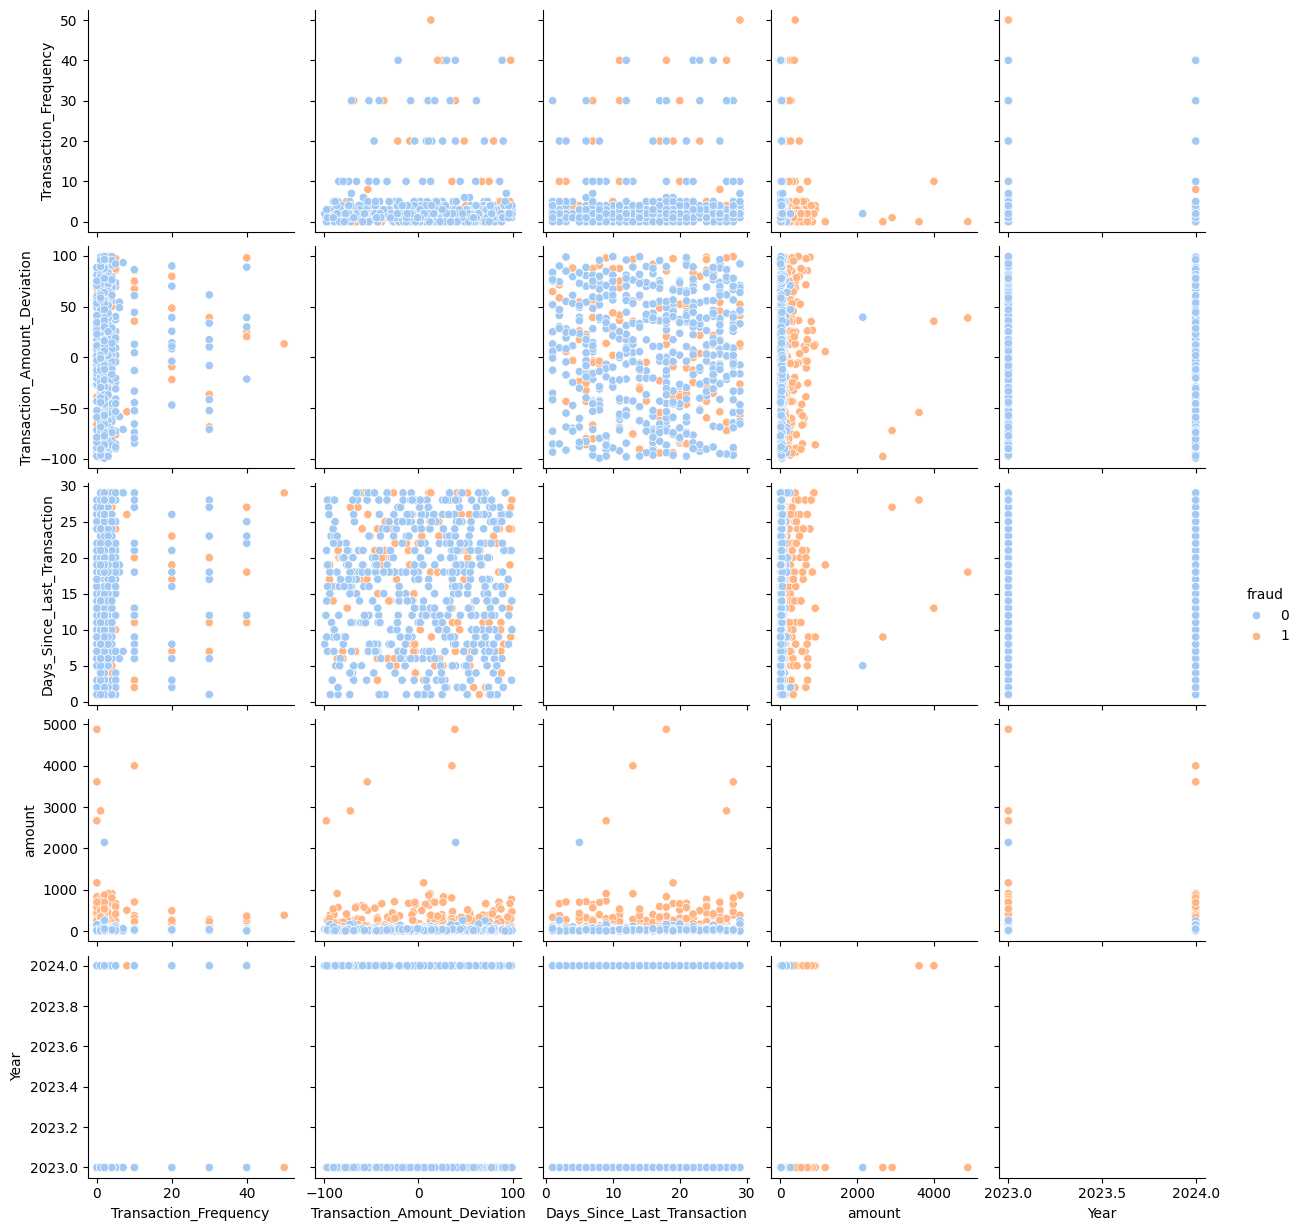

In [ ]:
sns.pairplot(data=df,hue='fraud',palette='pastel',diag_kind='dist')

In [ ]:
import plotly.express as px
import pandas as pd


df= pd.read_csv(r"C:\Users\EESHANI\Downloads\Copy of Sample_DATA.csv")

fraud = df[df['fraud'] == 1]

# Confirm fraud DataFrame exists
fig = px.bar(x = fraud [ 'Transaction_Type'].value_counts().index,
y = fraud [ 'Transaction_Type'].value_counts().values,
color = fraud ['Transaction_Type'].value_counts().index,
title = "FRAUD DISTRIBUTION BY TRANSACTION TYPE",
labels = {'x': 'Transaction_Type','y':'Fraud makers'},
color_discrete_sequence= px.colors.qualitative.Pastel)
fig.update_layout(xaxis = {'categoryorder':'total descending'})
fig.show(renderer="browser")  # Opens the chart in a web browser



fig = px.bar(x = fraud ['Payment_Gateway'].value_counts().index,
y = fraud ['Payment_Gateway'].value_counts().values,
color = fraud ['Payment_Gateway'].value_counts().index,
title = "FRAUD DISTRIBUTION BY Payment Gateway",
labels = {'x': 'Payment_Gateway','y':'Fraud makers'},
color_discrete_sequence= px.colors.qualitative.Pastel)
fig.update_layout(xaxis = {'categoryorder':'total descending'})
fig.show(renderer="browser")  # Opens the chart in a web browser





fig = px.bar(x = fraud ['Merchant_Category'].value_counts().index,
y = fraud ['Merchant_Category'].value_counts().values,
color = fraud ['Merchant_Category'].value_counts().index,
title = "FRAUD DISTRIBUTION BY Merchant Category",
labels = {'x': 'Merchant_Category','y':'Fraud makers'},
color_discrete_sequence= px.colors.qualitative.Pastel)
fig.update_layout(xaxis = {'categoryorder':'total descending'})
fig.show(renderer="browser")  # Opens the chart in a web browser




fig = px.histogram(fraud,x = 'amount',nbins=20,
title = " DISTRIBUTION of TRANSACTION AMOUNT",
labels = { 'amount','Transaction Amount'})
fig.show(renderer="browser")  # Opens the chart in a web browser







fig = px.scatter(fraud,x = 'Transaction_Frequency',y='fraud',
title = " RELATIONSHIP BETWEEN TRANSACTION FREQUENCY AND FRAUD",
labels = { 'Transaction_Frequency':'Transaction Frequency','fraud':'Fraud Makers'},
color='fraud',color_discrete_map={0:'lightblue',1:'orange'})
fig.show(renderer="browser")  # Opens the chart in a web browser






fig = px.scatter(fraud,x = 'Days_Since_Last_Transaction',y='fraud',
title = " RELATIONSHIP BETWEEN DAYS SINCE LAST TRANSACTION  AND FRAUD",
labels = { 'Days_Since_Last_Transaction':'DAYS SINCE LAST TRANSACTION ','fraud':'Fraud Makers'},
color='fraud',color_discrete_map={0:'lightblue',1:'orange'})
fig.show(renderer="browser")  # Opens the chart in a web browser



fig = px.bar(x = fraud ['Transaction_State'].value_counts().index,
y = fraud ['Transaction_State'].value_counts().values,
color = fraud ['Transaction_State'].value_counts().index,
title = "FRAUD DISTRIBUTION BY TRANSACTION STATE",
labels = {'x': 'Transaction_State','y':'Fraud makers'},
color_discrete_sequence= px.colors.qualitative.Pastel)
fig.update_layout(xaxis = {'categoryorder':'total descending'})
fig.show(renderer="browser")  # Opens the chart in a web browser






In [14]:
# Clean column names (remove extra spaces)
import pandas as pd
import datetime as dt


# Reload the dataset
df= pd.read_csv(r"C:\Users\EESHANI\Downloads\Copy of Sample_DATA.csv")

df['Date'] =pd.to_datetime(df['Date'],format = '%d/%m/%y')
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Month'].sort_values(ascending = True)
months = {1:'Jan',
          2:'Feb',
            3:'Mar',
              4:'Apr',
  5:'May',
  6:'Jun',
  7:'July',
  8:'Aug',
  9:'Sept',
  10:'Oct',
  11:'Nov',
  12:'Dec',

}
df['Month'] = df['Month'].map(months)




df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 647 entries, 0 to 646
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Transaction_ID                647 non-null    object        
 1   Date                          647 non-null    datetime64[ns]
 2   Time                          647 non-null    object        
 3   Merchant_ID                   647 non-null    object        
 4   Customer_ID                   647 non-null    object        
 5   Device_ID                     647 non-null    object        
 6   Transaction_Type              647 non-null    object        
 7   Payment_Gateway               647 non-null    object        
 8   Transaction_City              647 non-null    object        
 9   Transaction_State             647 non-null    object        
 10  IP_Address                    647 non-null    object        
 11  Transaction_Status            64

In [15]:


# Drop only the necessary columns
columns_to_drop=['Days_Since_Last_Transaction','Transaction_Frequency','Transaction_Amount_Deviation',
                 'Transaction_Status','Time','Device_OS','Transaction_Channel','Transaction_City','Date','Customer_ID','Merchant_ID','Transaction_ID','Device_ID','IP_Address']

df.drop(columns=[col for col in columns_to_drop if col in df.columns], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 647 entries, 0 to 646
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Transaction_Type   647 non-null    object 
 1   Payment_Gateway    647 non-null    object 
 2   Transaction_State  647 non-null    object 
 3   Merchant_Category  647 non-null    object 
 4   amount             647 non-null    float64
 5   fraud              647 non-null    int64  
 6   Year               647 non-null    int32  
 7   Month              647 non-null    object 
dtypes: float64(1), int32(1), int64(1), object(5)
memory usage: 38.0+ KB


In [16]:
df.shape

(647, 8)

In [17]:
data=df.copy()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 647 entries, 0 to 646
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Transaction_ID                647 non-null    object 
 1   Date                          647 non-null    object 
 2   Time                          647 non-null    object 
 3   Merchant_ID                   647 non-null    object 
 4   Customer_ID                   647 non-null    object 
 5   Device_ID                     647 non-null    object 
 6   Transaction_Type              647 non-null    object 
 7   Payment_Gateway               647 non-null    object 
 8   Transaction_City              647 non-null    object 
 9   Transaction_State             647 non-null    object 
 10  IP_Address                    647 non-null    object 
 11  Transaction_Status            647 non-null    object 
 12  Device_OS                     647 non-null    object 
 13  Trans

In [18]:
data['Year'] =data['Year'].astype('object')

In [19]:
categorical_cols=data.select_dtypes(include=['object']).columns
categorical_cols

Index(['Transaction_Type', 'Payment_Gateway', 'Transaction_State',
       'Merchant_Category', 'Year', 'Month'],
      dtype='object')

In [20]:
from sklearn.preprocessing import LabelEncoder
cols=['Year','Month']

label_encoder=LabelEncoder()
for col in cols:
    data[col] = label_encoder.fit_transform(data[col])

In [21]:
#non-ordinal
non_ordinal=['Transaction_Type','Payment_Gateway','Transaction_State','Merchant_Category']
data=pd.get_dummies(data,columns=non_ordinal,drop_first=True)
data=data.astype(int)

In [22]:
data.head()

,amount,fraud,Year,Month,Transaction_Type_Bill Payment,Transaction_Type_Investment,Transaction_Type_Other,Transaction_Type_Purchase,Transaction_Type_Refund,Transaction_Type_Subscription,...,Transaction_State_West Bengal,Merchant_Category_Donations and Devotion,Merchant_Category_Financial services and Taxes,Merchant_Category_Home delivery,Merchant_Category_Investment,Merchant_Category_More Services,Merchant_Category_Other,Merchant_Category_Purchases,Merchant_Category_Travel bookings,Merchant_Category_Utilities
0,396,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,121,1,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,106,1,0,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,3611,1,1,4,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,374,1,0,6,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [23]:
data.dtypes

amount                                            int64
fraud                                             int64
Year                                              int64
Month                                             int64
Transaction_Type_Bill Payment                     int64
Transaction_Type_Investment                       int64
Transaction_Type_Other                            int64
Transaction_Type_Purchase                         int64
Transaction_Type_Refund                           int64
Transaction_Type_Subscription                     int64
Payment_Gateway_Bank of Data                      int64
Payment_Gateway_CReditPAY                         int64
Payment_Gateway_Dummy Bank                        int64
Payment_Gateway_Gamma Bank                        int64
Payment_Gateway_Other                             int64
Payment_Gateway_SamplePay                         int64
Payment_Gateway_Sigma Bank                        int64
Payment_Gateway_UPI Pay                         

In [24]:
data.shape

(647, 54)

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
#split data into fraud and non fraud
fraud_data=data[data['fraud']==1]
non_fraud_data=data[data['fraud']== 0]
sampled_fraud_data= fraud_data.sample(frac=0.5,random_state=42)
sampled_non_fraud_data= non_fraud_data.sample(frac=0.5,random_state=42)
data = pd.concat([sampled_fraud_data,sampled_non_fraud_data])

# MODEL BUILDING

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#Perfomance Scaling
def preprocess_data(X):
    scaler =StandardScaler()
    X_scaled=scaler.fit_transform(X)
    return X_scaled
X = data.drop('fraud',axis=1)
y = data['fraud']
X_scaled= preprocess_data(X)
X_train,X_test,y_train,y_test=train_test_split(X_scaled, y,test_size=0.2,random_state=42)
print("TRAINING FEATURES SHAPE",X_train.shape)
print("TEST FEATURES SHAPE",X_test.shape)
print("TRAINING TARGET SHAPE",y_train.shape)
print("TEST TARGET SHAPE",y_test.shape)


TRAINING FEATURES SHAPE (259, 53)
TEST FEATURES SHAPE (65, 53)
TRAINING TARGET SHAPE (259,)
TEST TARGET SHAPE (65,)


# Model perfomance before data balancing i.e, with raw data

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
X_train,X_test,y_train,y_test=train_test_split(X, y,test_size=0.2,random_state=42,stratify=y)


def evaluate_model(model,X_test,y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)
    roc_auc = roc_auc_score(y_test,y_pred)


    return{
        'Model': type(model).__name__,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC AUC Score': roc_auc
    }



models = {
    "Decision Tree": DecisionTreeClassifier(),
    "RandomForest": RandomForestClassifier(),
    "GradientBoosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(),
    
}
results = []
for model_name ,model in models.items():
    print(model_name , ":")
    model.fit(X_train,y_train)
    metrics = evaluate_model(model,X_test,y_test)
    results.append(metrics)
df_results =pd.DataFrame(results)
df_results

Decision Tree :
RandomForest :
GradientBoosting :
XGBoost :


,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC Score
0,DecisionTreeClassifier,0.892308,0.800000,0.7500,0.774194,0.844388
1,RandomForestClassifier,0.953846,1.000000,0.8125,0.896552,0.906250
2,GradientBoostingClassifier,0.923077,0.866667,0.8125,0.838710,0.885842
3,XGBClassifier,0.969231,1.000000,0.8750,0.933333,0.937500


# OVERSAMPLING(SMOTE)

In [28]:
X = data.drop('fraud',axis = 1)
y = data['fraud']

In [29]:
X.shape

(324, 53)

In [30]:
y.shape

(324,)

In [31]:
from imblearn.over_sampling import SMOTE
X_res,y_res = SMOTE().fit_resample(X,y)
print(y_res.value_counts())

fraud
1    246
0    246
Name: count, dtype: int64


In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
X_train,X_test,y_train,y_test=train_test_split(X, y,test_size=0.2,random_state=42,stratify=y)


def evaluate_model(model,X_test,y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)
    roc_auc = roc_auc_score(y_test,y_pred)


    return{
        'Model': type(model).__name__,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC AUC Score': roc_auc
    }



models = {
    "Decision Tree": DecisionTreeClassifier(),
    "RandomForest": RandomForestClassifier(),
    "GradientBoosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(),
    
}
results = []
for model_name ,model in models.items():
    print(model_name , ":")
    model.fit(X_train,y_train)
    metrics = evaluate_model(model,X_test,y_test)
    results.append(metrics)
df_results =pd.DataFrame(results)
df_results

Decision Tree :
RandomForest :
GradientBoosting :
XGBoost :


,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC Score
0,DecisionTreeClassifier,0.876923,0.785714,0.6875,0.733333,0.813138
1,RandomForestClassifier,0.938462,1.000000,0.7500,0.857143,0.875000
2,GradientBoostingClassifier,0.938462,0.928571,0.8125,0.866667,0.896046
3,XGBClassifier,0.969231,1.000000,0.8750,0.933333,0.937500


In [33]:
import plotly.express as px

# Sort DataFrame by 'F1 Score'
df_results_sorted = df_results.sort_values(by='F1 Score', ascending=False)

# Create bar chart
fig = px.bar(
    df_results_sorted,
    x='Model',
    y='F1 Score',
    title="Model Performance Comparison",
    text='F1 Score',  # Display F1 Score values on bars
)

# Update layout
fig.update_layout(
    xaxis_title='Model',
    yaxis_title='F1 Score',
    xaxis={'categoryorder': 'total descending'},  # Ensures proper order
    margin=dict(l=20, r=20, t=50, b=20),
)

# Show the figure in a browser
fig.show(renderer="browser")


In [34]:

from sklearn.model_selection import GridSearchCV



# Define parameter grid
param_grid = {
    'Decision Tree': {'max_depth': [10, 20, 50],
                     'min_samples_split': [2, 5, 10]},
    
    'RandomForest': {'n_estimators': [50, 100, 200],
                     'max_depth': [10, 20],
                     'min_samples_split': [2, 5]},
    
    'GradientBoosting': {'n_estimators': [50, 100, 200],
                          'learning_rate': [0.05, 0.1],
                          'max_depth': [3,5]},  # Fixed max_depth
    
    'XGBoost': {'n_estimators': [50, 100, 200],
                'learning_rate': [0.05, 0.1],
                'max_depth': [3,5]}  # Fixed max_depth
}

# Dictionary to store best hyperparameters
best_params = {}

# Perform Grid Search for each model
for model_name, model in models.items():
    grid_search = GridSearchCV(estimator=model,
                               param_grid=param_grid[model_name],
                               scoring='f1',
                               cv=5,
                               verbose=2)
    
    grid_search.fit(X_train, y_train)
    best_params[model_name] = grid_search.best_params_

# Print best hyperparameters
for model_name, params in best_params.items():
    print(f"BEST HYPERPARAMETERS for {model_name}: {params}")


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END ..................max_depth=10, min_samples_split=2; total time=   0.0s
[CV] END ..................max_depth=10, min_samples_split=2; total time=   0.0s
[CV] END ..................max_depth=10, min_samples_split=2; total time=   0.0s
[CV] END ..................max_depth=10, min_samples_split=2; total time=   0.0s
[CV] END ..................max_depth=10, min_samples_split=2; total time=   0.0s
[CV] END ..................max_depth=10, min_samples_split=5; total time=   0.0s
[CV] END ..................max_depth=10, min_samples_split=5; total time=   0.0s
[CV] END ..................max_depth=10, min_samples_split=5; total time=   0.0s
[CV] END ..................max_depth=10, min_samples_split=5; total time=   0.0s
[CV] END ..................max_depth=10, min_samples_split=5; total time=   0.0s
[CV] END .................max_depth=10, min_samples_split=10; total time=   0.0s
[CV] END .................max_depth=10, min_sampl

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier



def evaluate_model(model,X_test,y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)
    roc_auc = roc_auc_score(y_test,y_pred)


    return{
        'Model': type(model).__name__,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC AUC Score': roc_auc
    }

X_train,X_test,y_train,y_test=train_test_split(X_res, y_res,test_size=0.2,random_state=42,stratify=y_res)


models = {
    "Decision Tree": DecisionTreeClassifier(max_depth=50,min_samples_split=10),
    "RandomForest": RandomForestClassifier(max_depth=20,min_samples_split=5,n_estimators=200),
    "GradientBoosting": GradientBoostingClassifier(learning_rate=0.1,max_depth=5,n_estimators=100),
    "XGBoost": XGBClassifier(learning_rate=0.1,max_depth=5,n_estimators=100),
    
}
results = []
for model_name ,model in models.items():
    print(model_name , ":")
    model.fit(X_train,y_train)
    metrics = evaluate_model(model,X_test,y_test)
    results.append(metrics)
df_results =pd.DataFrame(results)
df_results

Decision Tree :
RandomForest :
GradientBoosting :
XGBoost :


,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC Score
0,DecisionTreeClassifier,0.868687,0.846154,0.897959,0.871287,0.868980
1,RandomForestClassifier,0.949495,0.958333,0.938776,0.948454,0.949388
2,GradientBoostingClassifier,0.939394,0.957447,0.918367,0.937500,0.939184
3,XGBClassifier,0.939394,0.957447,0.918367,0.937500,0.939184


# CONCLUSION

In [37]:
from xgboost import XGBClassifier
XGBoost_model = XGBClassifier(learning_rate = 0.1, max_depth=5,n_estimators=100)
XGBoost_model.fit(X_res,y_res)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [1]:
import pickle

# Define file path for saving the model
pickle_file_path = "upi_fraud_detection.pkl"  # Fixed assignment

# Get the trained XGBoost model from the dictionary
XGBoost_model = models["XGBoost"]  # Ensure model is trained before saving

# Save the model as a pickle file
with open(pickle_file_path, 'wb') as file:
    pickle.dump(XGBoost_model, file)

print(f"XGBoost model saved successfully at {pickle_file_path}")


NameError: name 'models' is not defined